# Projet - détection de Buzz dans le réseau social Twitter


1.Introduction
    
    Twitter est un réseau social permettant le partage d'information sous forme de tweet qui sont des messages courts. La particularité de twitter est de pouvoir attacher à ce message des mots-clés (hashtag), qui peuvent alors être repris par d'autres utilisateurs, ou de pouvoir reprendre un message et le diffuser sur son propre compte, on parle alors de retweet. Avec la croissance du nombre d'utilisateurs, nous pouvons constater que certain messages et/ou information peuvent avoir un écho fort avec un impact sociétale. On parle alors de Buzz. 
    Cette étude à pour objectif de déterminer si un sujet en particulier, peut être considérer comme faisant Buzz ou non. Nous ferons cette étude sur une base de données de tweeter disponible sur le site de l'UCI(1). Ces données représentent 143000 tweets avec des indicateurs d'évolution sur certains critèes comme le nombre de discussions crées,...
    
    
2.Préliminaires
    
    2.1 Cadre général
    
    La notion de Buzz est mal définie dans la littérature et n'a pas de définition mathématique précise. On acceptera dans ce document que le Buzz représente l'acroissement rapide d'activité (Tweets, Retweets) sur une période donnée. 
    
    2.2 Description des données
    
    Les données sont extraites de la base de données de l'UCI qui ont servi de base pour l'étude menée par F. Kawala, A. Douzal-Chouakria, E. Gaussier, E. Dimert afin de prédire l'effet de Buzz dans les résaux Twitter et Tom's Hardware. Nous n'allons nous concentrer que sur l résau social Twitter qui est composé de 143000 tweets et 77 features, représentant en réalité que 11 features mesurées en 7 temps différents (7x11 = 77).
   

3.Visualisation des données
    
    3.1 Extraction des données
    Le code suivant permet d'extraire les données du fichier CSV et de les injecter dans un dataframe.

In [18]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

pathToDataset = "Twitter-Absolute-Sigma-500.csv"
data = pandas.read_csv(pathToDataset, sep=",",encoding="utf8")
data.head(30)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
0,889,939,960,805,805,1143,1121,549,613,587,...,1.000000,1.000000,889,939,960,805,805,1143,1121,1
1,542,473,504,626,647,795,832,366,288,318,...,1.000000,1.000000,542,473,504,626,647,795,832,1
2,92,99,196,100,184,79,162,66,59,118,...,1.000000,1.000000,92,99,196,100,184,79,162,0
3,90,87,92,344,184,848,184,83,78,76,...,1.000000,1.000000,90,87,92,344,184,848,184,1
4,169,98,101,90,96,95,185,141,68,85,...,1.000000,1.000000,169,98,101,90,96,95,185,1
5,775,765,935,806,912,1095,1198,614,588,751,...,1.000000,1.000000,775,765,935,806,912,1095,1198,1
6,469,1092,332,354,357,676,1189,348,909,261,...,1.000000,1.000000,469,1092,332,354,357,676,1189,1
7,818,693,756,1099,877,871,1409,578,516,546,...,1.000000,1.000000,818,693,756,1099,877,871,1409,1
8,832,628,898,944,993,983,1037,543,432,627,...,1.000000,1.000000,832,628,898,944,993,983,1037,1
9,920,1071,833,662,851,1096,1067,659,790,601,...,1.000000,1.013109,920,1071,833,662,851,1096,1068,1


    3.2 Description des variables
    
NCD : Number of created discussions
AI : Author increase
AS(NA) : Attention Level (measured with number of authors)
AS(NAC) : Attention Level (measured with number of contributions)
BL : Burstiness level
NAC : Number of Atomic Containers
CS : Contribution Sparseness 
AT : Author iteration
NA :  Number of Authors
ADL : Average Discussions Length
NAD : Average Discussions Length

Parmis ces variables 3 sont des indicateurs relatifs aux auteurs tandis que le reste, 8 variables donc, sont relatifs aux discussions. Dans l'étude qui suit, nous nous poserons la question lors de l'application de nos méthode d'identifier les variables significatives en ségrégant tout d'abord variables d'auteurs et variables de discussions, puis en les fusionnant.

Retirer des données à étudier la dernière colonne correspondant au résultat (buzz ou pas buzz)

****observation des données sous forme graphique et de leur évolution avec le temps
Nous allons dans un premier temps observer les données selon leur catorisation initiale afin de déterminer si par l'observation une intuition peut se dégager.


In [53]:
#normalisation de donnee par la moyenne
df_nonNormalized = data.iloc[:, :77]
print(df_nonNormalized.shape)
y = data.iloc[:,77]

cccolumn = df_nonNormalized
#cccolumn[cccolumn==0] = 1
stdColumns = cccolumn.std()
#stdColumns[stdColumns == 0] = 1
df_Normalized =(df_nonNormalized - df_nonNormalized.mean()) / stdColumns

(140707, 77)


# Quelques exemples 

In [57]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# n : number of observations we wish to display
def plotBuzz(originalData,n,withbuzz,withoutbuzz):
    notbuzzindex = np.where(y==0)[0][0:n]
    buzzindex = np.where(y==1)[0][0:n]
    
    varsToDisplay= np.arange(0,77,7)
    variableNames = originalData.iloc[:,varsToDisplay].columns

    buzz = originalData.iloc[buzzindex,:]
    notbuzz = originalData.iloc[notbuzzindex,:]
    
    x= np.arange(0,7)
    gs = gridspec.GridSpec(6, 2)
    fig1 = plt.figure(num=1, figsize=(18, 20), dpi=80, facecolor='w', edgecolor='k')
    for i in range(0,7) :       
            ax = fig1.add_subplot(gs[i])
            if withbuzz == 1 :
                ax.plot(x,buzz.iloc[:,i:i+7].transpose(),'-o', label = 'buzz')
            if withoutbuzz == 1 : 
                ax.plot(x,notbuzz.iloc[:,i:i+7].transpose(),'-^', label = 'no buzz')
            plt.xlabel('t', fontsize=18)
            ax.xaxis.set_label_coords(1.02, -0.025)
            plt.title(variableNames[i], fontsize=20, fontname="Bold")
            #ax.legend(loc='best')

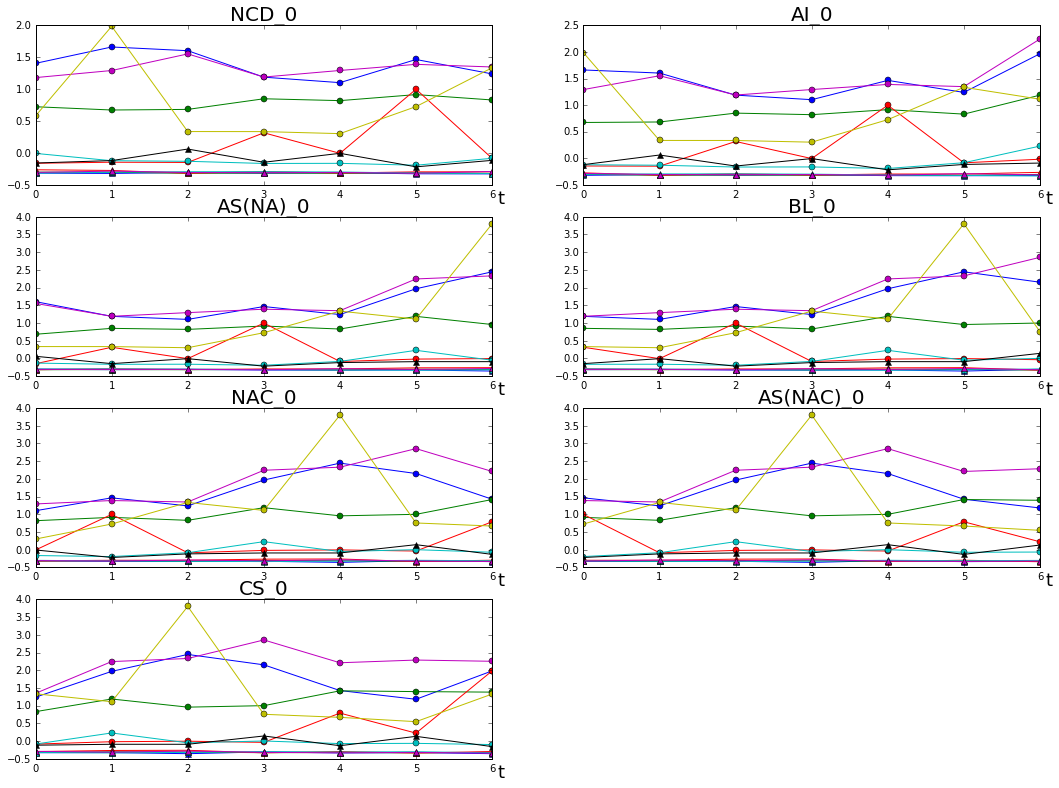

In [58]:
plotBuzz(df_Normalized,6,1,1)
#df_Normalized.iloc[:,0:7]
#np.where(y==0)[0][0:4]

L'observation nous permet de degager une observation majeur. L'etat de Buzz est soit une fonction croissante des variables AS, NA, NAC,AS(NAC). Ou un Buzz peut etre caracterise par la croissance soudaine d'une ou plusieurs variables.
En ce sens il est pertinent pour notre prediction de considerer les acroissements en T0 et T6. Nous considererons les accroissements entre la periode T0 et la valeur MAX atteinte entre T1 et T6.


In [86]:
indices_variables_auteurs = [7,49,56]
#ajoout de variable d'accroissement
t = []
for i in range(0,76) : 
    ind = i %7
    if(ind == 0):
        t.append(i)

t = np.asarray(t)

accroissements = pandas.DataFrame({})
for i in t :
    maxes = df_nonNormalized.iloc[:,i:i+7].max(1)
#    maxes = df_nonNormalized.iloc[:,i+6]
    cccolumn = df_nonNormalized.iloc[:,i]
    # Pour les variables qui commencent a 0, eviter de diviser par 0
#    column[column==0] = 1
#    accroissements[i] = (maxes - df_nonNormalized.iloc[:,i])/column
    accroissements[i] = (maxes - cccolumn)/cccolumn*100 #df_nonNormalized.iloc[:,i+6]
accroissements.columns = df_nonNormalized.iloc[:,t].columns + "_increase"
#df_nonNormalized = pandas.concat([df_nonNormalized,accroissements],axis =1)

In [85]:
accroissements.head(10)

,NCD_0_increase,AI_0_increase,AS(NA)_0_increase,BL_0_increase,NAC_0_increase,AS(NAC)_0_increase,CS_0_increase,AT_0_increase,NA_0_increase,ADL_0_increase,NAD_0_increase
0,28.571429,26.775956,23.972603,0,28.571429,28.507795,0,0.0000,23.899371,0.0000,28.571429
1,53.505535,48.907104,41.005803,0,53.505535,44.186047,0,0.0000,56.280193,0.0000,53.505535
2,113.043478,98.484848,164.102564,0,113.043478,173.529412,0,0.0000,94.666667,0.0000,113.043478
3,842.222222,738.554217,635.398230,0,842.222222,711.258278,0,0.0000,792.134831,0.0000,842.222222
4,9.467456,13.475177,16.867470,0,9.467456,14.285714,0,0.0000,12.883436,0.0000,9.467456
5,54.580645,34.853420,39.476961,0,54.580645,46.212121,0,0.0000,51.079137,0.0000,54.580645
6,153.518124,161.206897,108.409506,0,153.518124,105.300353,0,0.0000,138.274336,0.0000,153.518124
7,72.249389,107.266436,76.720901,0,72.249389,69.095477,0,0.0910,81.436314,0.0910,72.249389
8,24.639423,36.648250,19.385343,0,24.639423,15.479115,0,0.0000,26.718547,0.0000,24.639423
9,19.130435,23.065250,23.049220,0,19.130435,19.801980,0,1.2172,16.435185,1.3109,19.130435


,NCD_0_increase,AI_0_increase,AS(NA)_0_increase,BL_0_increase,NAC_0_increase,AS(NAC)_0_increase,CS_0_increase,AT_0_increase,NA_0_increase,ADL_0_increase,NAD_0_increase
0,0.285714,0.267760,0.239726,0,0.285714,0.285078,0,0.000000,0.238994,0.000000,0.285714
1,0.535055,0.489071,0.410058,0,0.535055,0.441860,0,0.000000,0.562802,0.000000,0.535055
2,1.130435,0.984848,1.641026,0,1.130435,1.735294,0,0.000000,0.946667,0.000000,1.130435
3,8.422222,7.385542,6.353982,0,8.422222,7.112583,0,0.000000,7.921348,0.000000,8.422222
4,0.094675,0.134752,0.168675,0,0.094675,0.142857,0,0.000000,0.128834,0.000000,0.094675
5,0.545806,0.348534,0.394770,0,0.545806,0.462121,0,0.000000,0.510791,0.000000,0.545806
6,1.535181,1.612069,1.084095,0,1.535181,1.053004,0,0.000000,1.382743,0.000000,1.535181
7,0.722494,1.072664,0.767209,0,0.722494,0.690955,0,0.000910,0.814363,0.000910,0.722494
8,0.246394,0.366483,0.193853,0,0.246394,0.154791,0,0.000000,0.267185,0.000000,0.246394
9,0.191304,0.230653,0.230492,0,0.191304,0.198020,0,0.012172,0.164352,0.013109,0.191304


In [47]:
df_nonNormalized.iloc[0:4,indices[46:53]]

NameError: name 'indices' is not defined

# 1.Tentative de sélection de variables : Random Forest
On utilise le random forest sur toutes les variables à un seul instant (t=0) pour essayer de voir s'il y en a certaines qui se démarquent, en utilisant les importances de chacunes.

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5,random_state=0)

forest.fit(df.iloc[:,t], y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
vraisIndices = t[indices]

NameError: name 't' is not defined

NameError: name 't' is not defined

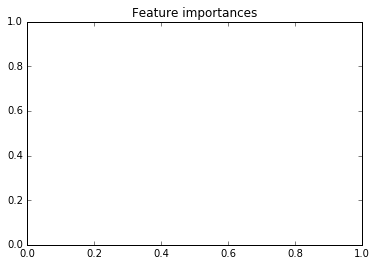

In [10]:
%matplotlib inline
plt.title("Feature importances")
plt.bar(range(1,len(t)), importances[indices][1:len(t)],
       color="r", yerr=std[indices[1:len(t)]], align="center")
plt.xticks(range(1,len(t)), df[vraisIndices[1:len(t)]].columns)

# Random forest sur toutes les variables

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5,
                              random_state=0)

forest.fit(df_Normalized, y)
importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_],
 #            axis=0)
indices = np.argsort(importances)[::-1]

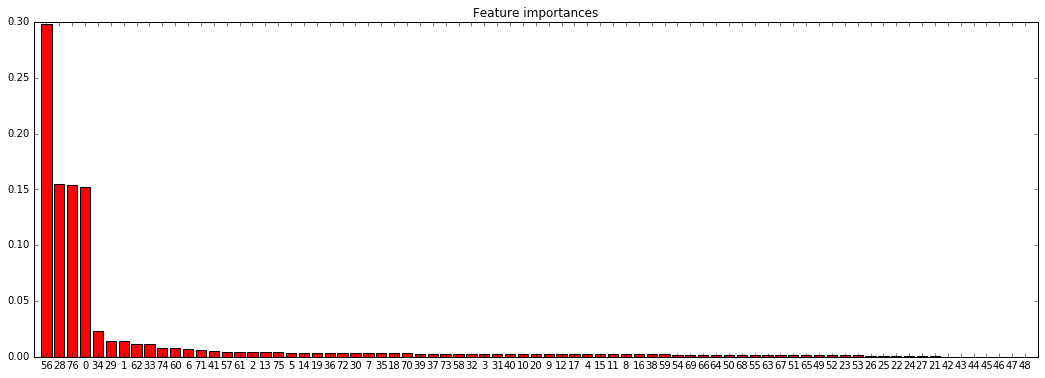

In [14]:
%matplotlib inline
X = df_Normalized

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

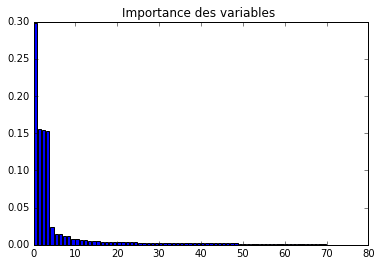

In [15]:
%matplotlib inline
plt.bar(range(X.shape[1]), importances[indices])
plt.title("Importance des variables ")

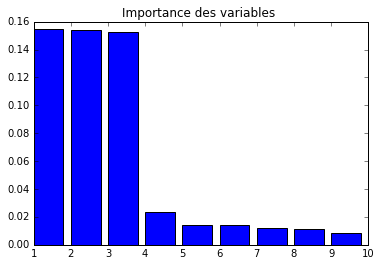

In [16]:
%matplotlib inline
plt.bar(range(1,10), importances[indices][1:10])
plt.title("Importance des variables ")

NameError: name 'std' is not defined

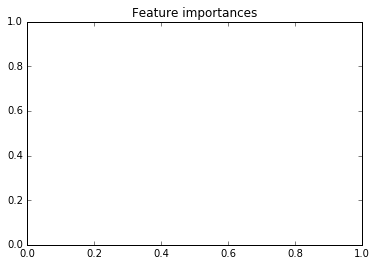

In [17]:
plt.title("Feature importances")
plt.bar(range(1,10), importances[indices][1:10],
       color="r", yerr=std[indices[1:10]], align="center")
plt.xticks(range(1,10), df[indices[1:10]].columns)

## Selection de features avec SelectModel

In [18]:
from sklearn.feature_selection import SelectFromModel
# threshold chosen is the mean (by default) (equivalent to importances[importances>np.mean(importances)])
model = SelectFromModel(forest, prefit=True)
X_new = model.transform(df)

NameError: name 'df' is not defined

In [19]:
test = pandas.DataFrame(X_new)
selectedVariables = df.columns[model.get_support(range(0,76))]

print("Les variables sélectionnées pour l'étude :",selectedVariables.tolist())


NameError: name 'X_new' is not defined

# 2. Agrégation de variables 

Ajout de nouvelles variables (colonnes) de l'accroissement entre t=0 et t=6 pour chacun des types des variables.

D:\pyensae\python\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# 3. Méthode 1 : K-NN neighbours classifier

## Cross-validation testing (using 5 folds)

In [20]:
from sklearn.cross_validation import KFold
from sklearn import neighbors
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import zero_one_loss

def knnClassifier(data,y,n_jobs):
    scores = np.zeros((10,5))
    for n_neighbors in range(1,11):
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform",metric="manhattan",p=2,n_jobs=n_jobs)
        predicted = cross_val_predict(clf, data,y, cv=5)
        scores[n_neighbors - 1] = 1 - zero_one_loss(y,predicted,normalize=True)
    mean_scores = scores.mean(1)
    kmax = mean_scores.argmax() 
    print("K choisi : ",kmax," pour le score : ", mean_scores[kmax -1])

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_predict

def knnClassifierWithAccuracy(data,y,n_jobs):
    scores = np.zeros((10,5))
    accuracy = np.zeros(10)
    for n_neighbors in range(1,11):
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform",metric="manhattan",p=2,n_jobs=n_jobs)
        y_predict = cross_val_predict(clf, data, y= y, cv=5)
        accuracy[n_neighbors - 1] = accuracy_score(y, y_predict)
    k = accuracy.argmax()
    print("K choisi : ",k," pour le score : ", accuracy[k])

Classifier avec toutes les variables d'accroissements : 

In [22]:
import timeit
start_time = timeit.default_timer()
knnClassifier(accroissements,y,-1)
elapsed = timeit.default_timer() - start_time
print(elapsed,"seconds")

NameError: name 'accroissements' is not defined

Classifier qu'avec  les variables d'accroissement d'auteurs :

In [ ]:
knnClassifier(accroissements.iloc[:,np.divide(indices_variables_auteurs,7)],y,-1)

Classifier qu'avec les variables liées aux discussions : 

In [ ]:
indices_contributions_variables = np.setdiff1d(np.arange(0,11),np.divide(indices_variables_auteurs,7))

In [ ]:
knnClassifier(accroissements.iloc[:,indices_contributions_variables],y,-1)

In [13]:
knnClassifier(df_Normalized.iloc[:,indices[43:46]],y,-1)

K choisi :  9  pour le score :  0.935120498625


# 4. Méthode 2 : SVM 

Nous utilisons ici un modèle SVM linéaire pour des raisons computationnelles.
Le temps de calcul d'un modèle SVM polynomial , de degré 3 par exemple, prend énormément de temps à "fitter" pour notre jeu de données.

In [23]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score

def linearSVM(data,y):
    linear_svc = svm.LinearSVC(C=1,random_state=1234)

    scores = cross_val_score(linear_svc, data, y= y, cv=5,n_jobs=-1)
    print(scores.mean())

In [24]:
linearSVM(accroissements,y)

NameError: name 'accroissements' is not defined

In [ ]:
linearSVM(accroissements.iloc[:,indices_contributions_variables], y)

In [ ]:
linearSVM(accroissements.iloc[:,np.divide(indices_variables_auteurs,7)],y)